In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\Users\visha\OneDrive\Scaler Academy\Datasets\churn_logistic.csv')
df.sample(3)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
4109,56,0,162.3,149.1,255.5,14.8,4,0,0,99,...,78,12.67,115,11.50,1,4.00,CT,415,406-3069,1
2613,48,0,240.0,141.0,128.9,7.1,1,0,0,88,...,117,11.99,137,5.80,9,1.92,MI,415,407-2718,0
2159,132,0,190.1,182.2,279.8,13.0,1,0,0,105,...,116,15.49,105,12.59,2,3.51,KS,415,420-9973,0


In [3]:
df.Churn.value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [4]:
#make it imbalanced dataset so remove some of the rows
df.drop([4700, 5353, 5201, 4749],axis=0,inplace=True)

In [5]:
#use function since it is time taking
idx = df.index[df["Churn"] == 1]
len(idx)

2846

In [6]:
import random
idx_list = []
for _ in range(5000):
    idx_list.append(random.choice(idx))
len(idx_list)

5000

In [7]:
new_df = df.drop(idx_list, axis=0)
new_df.Churn.value_counts()

0    2850
1     533
Name: Churn, dtype: int64

In [8]:
494/(494+2850) #we have 85% and 15 data

0.14772727272727273

In [9]:
#these are the useful columns
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
y = df["Churn"]
X = df[cols]
X.shape

(5696, 5)

In [10]:
# Train, CV, test split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42)

In [11]:
errors = []
# Calculating error for K values between 1 and 50
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    errors.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Mean Error')

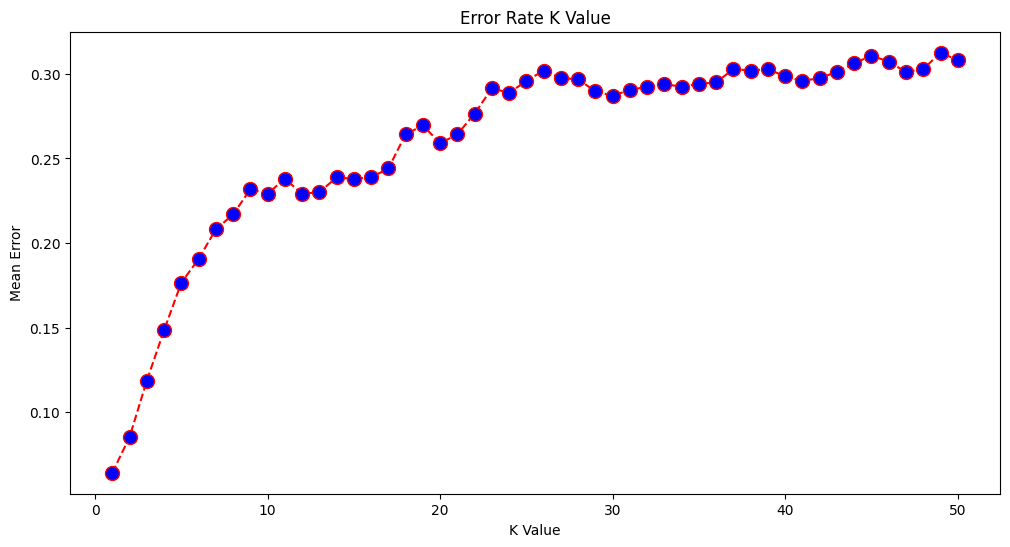

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), errors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [13]:
knn = KNeighborsClassifier(n_neighbors=1,metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [14]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test) #fining Accuracy = (correct/total)

0.9166666666666666

In [15]:
#we are more interest into f1 score harmonic mean of precision and recall
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[483,  91],
       [  4, 562]], dtype=int64)

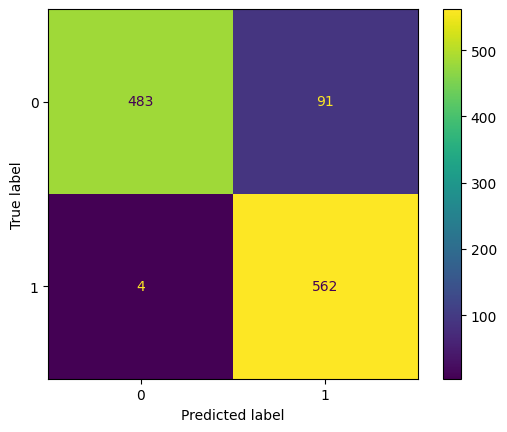

In [17]:
disp = ConfusionMatrixDisplay(cm , display_labels = knn.classes_ )
disp.plot()

#p = tp/tp+fp
#r = tp/tp+fn
#f1-score = 2xpxr/p+r

In [18]:
#accuracy mislead us when we have imbalance so we should rely on the f1-score; 
#the harmonic mean of precsion and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       574
           1       0.86      0.99      0.92       566

    accuracy                           0.92      1140
   macro avg       0.93      0.92      0.92      1140
weighted avg       0.93      0.92      0.92      1140



In [29]:
from sklearn.metrics import fbeta_score
print(fbeta_score(y_test, y_pred, beta = 0.5)) #precision is important
print(fbeta_score(y_test, y_pred, beta = 2)) #recall is important

0.8842039018250473
0.9633184778882413


Handling Class Imbalance using Logistic Regression

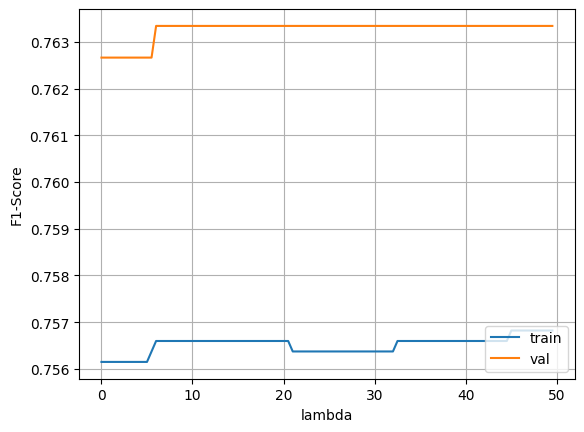

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

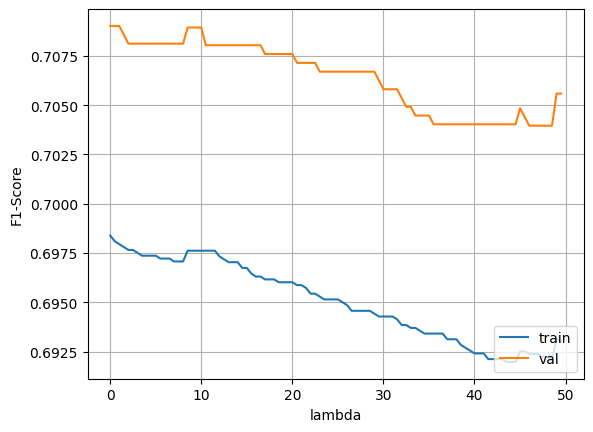

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la,class_weight=({0:1,1:6})))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [24]:
best_idx = np.argmax(val_scores)
print(val_scores[best_idx])

0.7090216010165183


In [25]:
best_idx

0

In [26]:
# Model with lambda_best
best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:1, 1:6 }))
scaled_lr.fit(X_train, y_train)

y_pred_test = scaled_lr.predict(X_test)
test_score = f1_score(y_test, y_pred_test)

print(test_score)

0.6993710691823899


In [27]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.18      0.31       574
           1       0.54      0.98      0.70       566

    accuracy                           0.58      1140
   macro avg       0.73      0.58      0.50      1140
weighted avg       0.73      0.58      0.50      1140



Sampling of Imbalance Dataset

In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
smt = SMOTE(sampling_strategy=0.5) #by defalut at Auto but this is also a hyperpatameter that is need to find to improve our model metrics
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 1718, 1: 859})


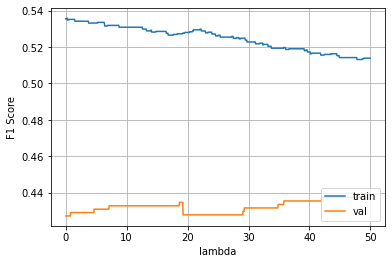

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.05

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_sm, y_sm)
  train_score = f1_score(y_sm, scaled_lr.predict(X_sm))
  val_score = f1_score(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1 Score")
plt.grid()
plt.show()

In [ ]:
# Model with lambda_best
best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_sm, y_sm)

y_pred_test = scaled_lr.predict(X_test)
test_score = f1_score(y_test, y_pred_test)

print(test_score)

0.537037037037037


In [31]:
print(classification_report(y_test, y_pred_test)) #good balance between precision and recall slighly more in recall.

              precision    recall  f1-score   support

           0       0.91      0.18      0.31       574
           1       0.54      0.98      0.70       566

    accuracy                           0.58      1140
   macro avg       0.73      0.58      0.50      1140
weighted avg       0.73      0.58      0.50      1140



In [ ]:
f2 = fbeta_score(y_test,y_pred_test,beta=2)
f0 = fbeta_score(y_test,y_pred_test,beta=0.5)

In [ ]:
print(f2, f0)

0.5587668593448939 0.516934046345811


Type of model <br>
-balance between precision and recall <br>
-better recall <br>
-better precision <br>
example we have seen above